# 决策树

决策树分为分类树和回归树。

## 基本流程

我们使用决策树作为预测模型来预测样本的类标，这种决策树也称作分类树或回归树。在这些树的结构里， 叶子节点给出类标而内部节点代表某个属性。以分类树为例，我们把样本分类的任务，可以看作对“当前样本属于正类吗？”这个问题“决策”或“判定”的过程。

决策树是基于**树结构（一种特殊的图结构）**来进行决策的。一般地，一棵决策树包含一个根节点、若干个内部节点和若干叶节点，叶节点存储的是决策结果，其他子节点对应的是属性分类器。**从根节点到每个叶节点的路径对应了一个判定测试序列，决策树的生成是一个递归过程**。

构建决策树时通常采用自上而下的方法，在每一步选择一个最好的属性来分裂。分类树和回归树有着不同的分裂方法。下面我们先介绍分类树。

<img src="https://lotabout.me/2018/decision-tree/decision-tree-abc.1.png" width="400" hegiht="300" align=left />

# 分类树

对于分类树而言，"最好" 的定义是使得子节点中的训练集纯度足够高。不同的算法使用不同的指标来定义"最好"。本部分介绍两个指标：**信息熵**和**基尼指数**。

## 信息增益

### 信息熵

信息熵是跟所有可能性有关系的。每个可能事件的发生都有个概率。信息熵就是平均而言发生一个事件我们得到的信息量大小。所以数学上，信息熵其实是信息量的期望。离散情况下数学定义如下：

$$ H(x)=-\sum_{x\in{X}}P(x)log_{2}P(x)$$

如果集合D为离散集合，里面一共有|y|类样本，第k类样本所占比例为$p_k$，则D的信息熵定义为：

$$ Ent(D)=-\sum_{k=1}^{|y|}P_k log_{2}P_k$$

Ent(D)的值越小，则D的纯度越高，下面介绍的基尼指数也有这个性质。

### 基尼指数

CART决策树(Classification and Regression Tree) 使用“基尼指数”来选择划分属性。数据集D的纯度可以通过基尼值来度量：

$$Gini(D) = \sum_{k=1}^{|y|}\sum_{k^{'}\neq k}p_k p_{k^{'}} = 1 - \sum_{k=1}^{|y|}p_k^2$$

Gini(D) 求最大值等价于一个带约束（所有概率求和等于1）的L2范数的最值问题。

注： $-log_{2}p_k$ 和 $p_{k^{'}}$ 在一阶taylor公式展开下是一样的，这也是为什么在实际选择特征时，两个的差异不是很大的原因。

**Gini(D)反映了从数据集D中随机抽取两个样本，其类别不一致的概率。Gini(D)越小，则数据集D的纯度越高。**属性a的基尼指数定义为：

$$ Gini\_index(D,a)=\sum_{v=1}^{V}\frac{|D^v|}{|D|} Gini(D^v)$$

### 信息增益

_**以信息熵为例来给出信息增益公式，该公式也适用于基尼指数。**_

**信息熵是度量样本集合纯度最常用的一个指标(基尼指数也可以)，Ent(D)的值越小，则D的纯度越高（Gini(D)也是一样的性质），也就是这个集合说必然性和确定性越高。**比如一个放满了红苹果的篮子里，所有类别（其实就红色苹果一个类别）对应的信息熵为0。

假设离散属性a有V个可能的取值 $\{a^1,a^2,...,a^V\}$，如果使用a来对样本进行划分，则根节点会产生V个分支节点，根节点所对应的样本集合D相应划分成V个子集，其中第v个分支节点上包含了D中所有在属性a上取值为 $a^v$ 的样本，记为 $D^v$ 。

针对每个分支上的子集，也会有对应的信息熵$ Ent(D^v)$ ，我们通过权重 $\frac{|D^v|}{|D|}$ 来给不同的节点赋予权重，让样本数越大的子集所对应的分支节点影响越大。那么我们可以给出属性a所对应的v个分支的整体信息熵如下：

$$ Ent(D,a)=\sum_{v=1}^{V}\frac{|D^v|}{|D|} Ent(D^v)$$

于是，我们可以计算出通过属性a来进行划分集合D所带来的_**“不确定性的减小（确定性的增加，纯度的提高）”，我们称之为“信息增益”，可以视之为属性a本身所带来的信息量**_。信息增益（information gain）定义如下：

$$ \begin{split}Gain(D,a) = & Ent(D) - Ent(D,a) \\
= & Ent(D) - \sum_{v=1}^{V}\frac{|D^v|}{|D|} Ent(D^v)
\end{split}$$

一般而言，信息增益越大，则意味着使用属性a来进行划分所获得的“纯度提升”越大。因此，我们可以用信息增益来进行决策树的划分属性选择。

_**决策树的决策过程可以看作将样本集D按照属性进行递归分割成不同子集，信息熵不断降低的一个过程。**_

### 增益率

根据信息增益的公式定义可知，Gain(D,a)中在D保持不变的情况下，V变大即a可取的值越多，对应的$D^v*Ent(D^v)$值会越小，所以Gain(D,a)会越大。**因此，信息增益原则对可取值数目较多的属性有偏好。**

**为减少这种偏好所带来的决策树的泛化能力的下降**，著名的C4.5A决策树算法不直接使用决策树，而是使用“增益率”来选择最优划分属性。增益率定义为：

$$Gain\_ratio(D,a)=\frac{Gain(D,a)}{IV(a)}$$
其中

$$IV(a) = -\sum_{v=1}^{V}\frac{|D^v|}{|D|}log_2{\frac{|D^v|}{|D|}}$$

称为属性a的“固有值”（intrinsic value）。**固有值相当于对每个属性的取值分布也计算了信息熵，属性的重要性随着固有值的增大而减小（也就是说，如果这个属性本身不确定性就很大，那我就越不倾向于选取它），算是对单纯用信息增益有所补偿**。

增益率准则对取值数目较少的属性有偏好，因此C4.5并不是直接选择增益率最大的候选划分属性，而是使用了启发式：**先通过信息增益选择高于平均水平的属性，再从中选择增益率最高的。**

### gini和entropy曲线对比

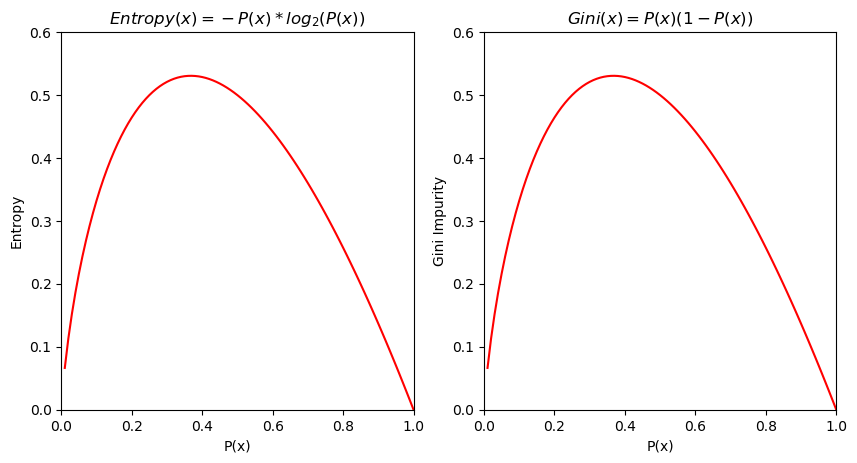

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def entropy(px):
    return - (px * np.log2(px))

def gini_impurity(px):
    return px * (1 - px)

x = np.linspace(0.01, 1, 100)
fig = plt.figure(figsize=(10, 5), dpi=100)
fig_0 = fig.add_subplot(1,2,1)
plt.title('$Entropy(x) = - P(x) * log_2(P(x))$')
plt.xlim(0, 1)
plt.ylim(0, 0.6)
plt.xlabel('P(x)')
plt.ylabel('Entropy')
plt.plot(x, entropy(x), 'r-');

fig_1 = fig.add_subplot(1,2,2)
plt.title('$Gini(x) = P(x) (1 - P(x))$')
plt.xlim(0, 1)
plt.ylim(0, 0.6)
plt.xlabel('P(x)')
plt.ylabel('Gini Impurity')
plt.plot(x, entropy(x), 'r-');

_**通过对比两条度量集合信息纯度的曲线可以看出，在调用sklearn的决策树包时，选择gini指数还是信息熵作为衡量集合纯度的差别不是很大。**_

## 防止过拟合：剪枝算法

使用决策树模型进行拟合数据时，容易造成过拟合。解决办法是对决策树进行剪枝处理。有两种思路：预剪枝（Pre-Pruning）和后剪枝（Post-Pruning）。

### 预剪枝 

**定义**

预剪枝是指在决策树生成过程中，对每个节点在划分前先进行估计，若当前节点的划分不能带来决策树泛化性能提升，则停止划分并将当前节点标记为叶节点。

**预剪枝的策略可以选择如下几种：**
* 将样本集合分为训练集和验证集，针对某个属性划分前后，基于信息增益原则，看划分后验证集的精度是否提高来确定是否剪枝；
* 设定阈值，基于信息增益原则，信息熵减少的数量低于阈值，停止创建分支；
* 限制叶子节点的样本个数，低于某个阈值，停止创建分支。

**预剪枝的优缺点：**
* 优点： 预剪枝使得很多分支没有“展开”，特征变少，不仅降低了过拟合的风险，还显著减少了决策树的训练和测试时间开销；
* 缺点： 有些分支虽然目前不能提高泛化性能、甚至可能导致泛化性能暂时下降，但在其基础上的后续划分有可能导致性能显著提高；预剪枝的“贪心”策略本质禁止这些分支展开，带来了欠拟合的风险（可以考虑引入模拟退火的启发式算法的思路，来概率选择剪枝）

### 后剪枝 

**定义**

后剪枝是先从训练集生成一棵完整的决策树，然后自底向上地对非叶节点进行考察，删除一些子树，用子树的根节点代替来作为新的叶子节点。后剪枝是目前比较普遍的做法。

**后剪枝的策略可以选择如下几种：**
* 将样本集合分为训练集和验证集，自底而上，基于信息增益原则，对非叶节点进行考察，用子树根节点代替作为新叶子节点后验证集精度是否提高来确定是否剪枝；
* 设定阈值，基于信息增益原则，判断如果子树合并为叶子后信息熵的增加量是否小于某一阈值，如果小于，则可以合并。将新叶子节点所表示的类别按照多数原则来确定；

**后剪枝算法举例：降低错误率剪枝法**。
    通过后剪枝策略构建出简化版的决策树后，使用交叉验证数据集来测试对比简化版和原来版本的决策树，看看错误率是否降低来决定用哪个版本。之后遍历每一棵子树，直到无法降低错误率为止。

**后剪枝的优缺点：**
* 优点： 后剪枝决策树的欠拟合风险小，泛化性能往往优于预剪枝，原因是避免了预剪枝“贪心”的本质；
* 缺点： 训练时间开销比未剪枝决策树和预剪枝决策树都要大得多。

## 连续值处理

上面的理论都限定于离散属性，遇到连续属性，可以通过连续属性离散化的技术来处理，比如二分法。

需要注意的是，**与离散属性不同，若当前节点划分属性为连续属性，该属性还可以作为其后代节点的划分属性。**

## 缺失值处理

我们要面对两个问题：

1. **从选择属性角度**：如何在属性有缺失值的情况下进行划分属性选择？
2. **从样本划分角度**：在给定划分属性后，如果样本在该属性值上缺失，如何对样本进行划分？

给定训练集 D 和 属性 a，令 $\tilde{D}$ 表示 D 中属性 a 上没有缺失值的样本子集。对于问题1，我们可以通过 $\tilde{D}$ 来判断 a 的优劣。

假设离散属性a有V个可能的取值$\{a^1,a^2,...,a^V\}$，令 $\tilde{D}^v$ 表示在 D 中 属性 a 取值为 $a^v$ 的样本子集， $\tilde{D}_k$ 表示 D 中 属于第 k 类($k = 1,2, ...,|Y|$)的样本子集，显然有 $\tilde{D} = \cup_{k=1}^{|Y|}\tilde{D}_k， \tilde{D} = \cup_{v=1}^{V}\tilde{D}^v$。假定我们为每个样本赋予一个权重$ w_{\mathbf{x}}$，定义

$$\begin{split}
 \rho &= \frac{\sum_{\mathbf{x}\in \tilde{D}} w_{\mathbf{x}}}{\sum_{\mathbf{x}\in D} w_{\mathbf{x}}}\\
 \tilde{p}_k &= \frac{\sum_{\mathbf{x}\in \tilde{D}_k} w_{\mathbf{x}}}{\sum_{\mathbf{x}\in \tilde{D}} w_{\mathbf{x}}} \quad (1\leq k \leq |Y|) \\
\tilde{r}_v &= \frac{\sum_{\mathbf{x}\in \tilde{D}^v} w_{\mathbf{x}}}{\sum_{\mathbf{x}\in \tilde{D}} w_{\mathbf{x}}} \quad (1\leq v \leq V)
\end{split}$$

直观地看，对于属性 a， $\rho$ 表示无缺失值样本所占整体样本的比例，$\tilde{p}_k$ 表示无缺失值样本中标签为第 k 类的样本的比例， $\tilde{r}_v$ 表示属性 a 上取值为 $a^v$ 的样本所占的比例。显然，$\sum_{k=1}^{|Y|}\tilde{p}_k = 1， \sum_{v=1}^{V}\tilde{r}^v = 1$。

基于上面的定义，我们可以将信息增益的公式进行加权推广为

$$ \begin{split}Gain(D,a) &= \rho\times Gain(\tilde{D},a)\\
&= \rho\times\left(Ent(\tilde{D}) - \sum_{v=1}^{V}\tilde{r}^v Ent(\tilde{D}^v)\right)
\end{split}$$

其中

$$ Ent(\tilde{D})=-\sum_{k=1}^{|Y|}\tilde{p}_k log_{2}\tilde{p}_k$$

对于问题2，样本 $\mathbf{x}$ 在划分属性 a 上的取值未知，则**将 $\mathbf{x}$ 同时划入所有子节点，并且在属性值 $a^v$ 对应的子集中更新样本权重 $\tilde{w}_\mathbf{x} = \tilde{r}_v w_\mathbf{x}$.直观看，就是让同一个样本以不同的概率划入到不同的子节点中去。**

## 多变量决策树

若把每个属性视为空间的一个坐标轴，则之前对样本集合D的划分边界线都是和坐标轴平行的。当属性太多时，要进行大量的属性测试，时间成本高。如果非叶节点不再是对某个属性，而是对属性的线性组合进行测试，寻找合适的线性分类器，就可以得到一棵多变量决策树。

## 对模型的实验总结

1. 在信息增益、增益率、基尼指数外，还可以设计其他的准则，这些准则虽然对决策树的尺寸有较大影响，但对泛化性能影响有限。有研究表明，仅在2%的情况下有所不同；在运算效率上，基尼指数会快一些，因为不涉及对数运算。
2. 剪枝方法和程度对决策树泛化能力性能有显著的影响。有实验研究表明，数据带有噪声时通过剪枝最多可以提高泛化能力到25%。

## [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier)

## 预测泰坦尼克号幸存者

我们通过决策树模型来预测哪些人可能成为幸存者。

### 数据分析

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def read_dataset(fname):
    # 指定第一列作为行索引
    data = pd.read_csv(fname, index_col=0) 
    # 丢弃无用的数据
    data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    # 处理性别数据
    data['Sex'] = (data['Sex'] == 'male').astype('int')
    # 处理登船港口数据
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n: labels.index(n))
    # 处理缺失数据
    data = data.fillna(0)
    return data

train = read_dataset('datasets/titanic/train.csv')

In [3]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


### 模型训练

In [4]:
from sklearn.model_selection import train_test_split

y = train['Survived'].values
X = train.drop(['Survived'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('train dataset: {0}; test dataset: {1}'.format(
    X_train.shape, X_test.shape))

train dataset: (712L, 7L); test dataset: (179L, 7L)


In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Mean accuracy of self.predict(X) wrt. y.
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.981741573034; test score: 0.765363128492


从输出看到，针对训练样本评分很高，针对交叉验证数据评分比较低，差距较大，这是过拟合的特征。决策树可以通过后剪枝和前剪枝来解决过拟合。然而，sklearn不支持后剪枝，但提供一系列模型参数进行前剪枝。比如通过max_depth来决定树的深度。

### 优化模型参数

best param: 6; best score: 0.837988826816


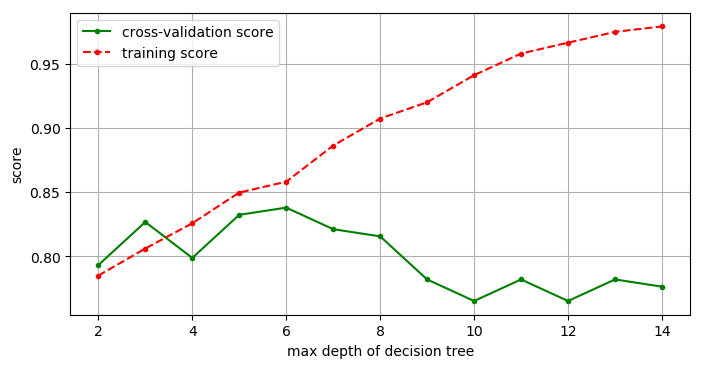

In [15]:
# 参数选择 max_depth
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

depths = range(2, 15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

plt.figure(figsize=(8, 4), dpi=100)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')
plt.plot(depths, tr_scores, '.r--', label='training score')
plt.legend()

best param_of_gini: 0.00222222222222; best score: 0.832402234637
best param_of_entropy: 0.00666666666667; best score: 0.832402234637
100 100


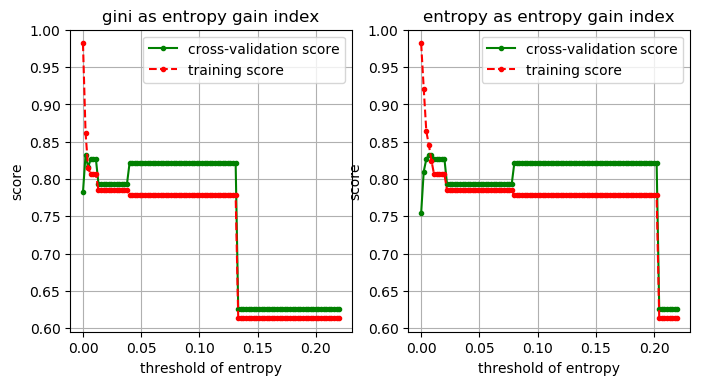

In [33]:
# 参数选择 min_inpurity_split
def cv_score(val, criterion):
    clf = DecisionTreeClassifier(criterion=criterion, min_impurity_decrease=val)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

# 指定参数范围，分别训练模型，并计算评分
def find_best_param(criterion, values):
    scores = [cv_score(v, criterion) for v in values]
    tr_scores = [s[0] for s in scores]
    cv_scores = [s[1] for s in scores]

    # 找出评分最高的模型参数
    best_score_index = np.argmax(cv_scores)
    best_score = cv_scores[best_score_index]
    best_param = values[best_score_index]
    print('best param_of_{0}: {1}; best score: {2}'.format(criterion, best_param, best_score))
    return tr_scores, cv_scores, values
    

# 画出模型参数与模型评分的关系
tr_scores, cv_scores, values = find_best_param(criterion='gini', values = np.linspace(0, 0.22, 100))
tr_scores_1, cv_scores_1, values = find_best_param(criterion='entropy', values = np.linspace(0, 0.22, 100))

fig = plt.figure(figsize=(8,4), dpi=100)
fig_0 = fig.add_subplot(1,2,1)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.title('gini as entropy gain index')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()

fig_1 = fig.add_subplot(1,2,2)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.title('entropy as entropy gain index')
plt.plot(values, cv_scores_1, '.g-', label='cross-validation score')
plt.plot(values, tr_scores_1, '.r--', label='training score')
plt.legend()

**从上图可知**：
1. 随着min_inpurity_split的增大，train score和cv score从过拟合逐渐向欠拟合过渡（对应的是决策树树深度逐渐变浅的过程）；
2. 对比上面两图，以gini指数和entropy为参数去计算信息增益，会发现entropy对应的best param会偏向右移动，整个曲线也更右移；
3. 虽然gini指数和entropy为参数对应的min_inpurity_split最佳值有所差异，但会发现对应的best score差别不大。这也是我们所说的，对于决策树，相比调节计算信息增益的方法，剪枝效果会更突出。

### [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [36]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(8, 4), dpi=100)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

best param: {'min_impurity_decrease': 0.0012244897959183673}
best score: 0.812570145903


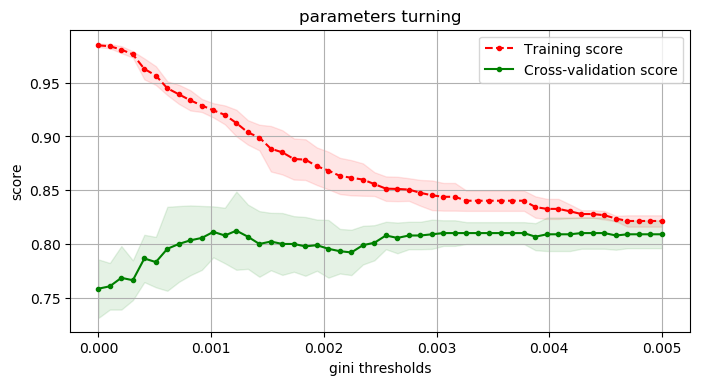

In [37]:
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.005, 50)
# Set the parameters by cross-validation
param_grid = {'min_impurity_decrease': thresholds}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')

对于GridSerchCV,关键的参数是：
1. param_grid：dict or list of dictionaries。会枚举遍历每个参数；
2. cv:表示5折交叉验证；
3. clf.best_params_：最优参数；
4. clf.best_score_：最优得分；
5. clf.cv_results_：中间结果；

接下来看如何在多组参数之间选择最优参数：

In [38]:
from sklearn.model_selection import GridSearchCV

entropy_thresholds = np.linspace(0, 0.01, 50)
gini_thresholds = np.linspace(0, 0.005, 50)

# Set the parameters by cross-validation
param_grid = [{'criterion': ['entropy'], 
               'min_impurity_decrease': entropy_thresholds},
              {'criterion': ['gini'], 
               'min_impurity_decrease': gini_thresholds},
              {'max_depth': range(2, 10)},
              {'min_samples_split': range(2, 30, 2)}]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_,clf.best_score_))

best param: {'min_impurity_decrease': 0.0028571428571428571, 'criterion': 'entropy'}
best score: 0.822671156004


### 生成决策树图形

In [43]:
from sklearn.tree import export_graphviz
clf = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.002857142857142857)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

# 导出 titanic.dot 文件
with open("figure/titanic.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)

# 1. 在电脑上安装 graphviz
# 2. 运行 `dot -Tpng titanic.dot -o titanic.png` 
# 3. 在当前目录查看生成的决策树 titanic.png

train score: 0.890449438202; test score: 0.826815642458


<img src="figure/titanic.png" width="500" hegiht="400" align=left />

# 回归树

下面内容参考自 统计学习书 [ESL](https://web.stanford.edu/~hastie/Papers/ESLII.pdf).

## 基本想法

回归树是针对连续型的训练样本，是一个预测新样本的值的外套。

假设我们的训练数据有两个连续数值的特征，即样本向量为$(X_1, X_2, Y)$。下面左图是由两个特征组成的特征空间，我们采用二分法来讲特征空间分成不同的区域$R_i$。对于新的要预测样本，我们按照**特征划分顺序**和**特征最佳划分值**对新样本进行归类，并且将新样本所属区域的**一个特定常数**视为新样本的预测值。

所以我们的重点是：
1. **通过递归的方法通过二分法来在每一次划分中选择最佳的划分属性及对应的属性划分值**；
2. **迭代停止的条件**。

如下图所示，特征空间被分为5个区域，假设每个区域对应对应的特定常数为$c_i$，则对于新的变量 $\mathbf{X}$, 对应的预测值  $\tilde{f}(\mathbf{X})$ 为

$$\tilde{f}(\mathbf{X}) = \sum_{m=1}^5 c_m I(\{X_1, X_2\}\in R_m)$$

其中 $I(\cdot)$ 表示真值函数，即里面的条件为真取值为1，否则取值为0.

也就是说，对于新样本属于哪个区域，则取值为对应的常数$c_m$.这个划分的过程也可以等价转化为下面有图的表达形式。 

<img src="figure/regressiontree_1.png" width="400" hegiht="300" align=left />
<img src="figure/regressiontree_2.png" width="400" hegiht="300" align=right />

## 求解回归树

下面我们讨论一般意义上如何生成一棵回归树。

给定训练数据集 $D = \{ (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ... , (\mathbf{x}_N, y_N)\},$ 其中 $ \mathbf{x}_i = (x_{i1}, x_{i2}, ...,x_{ip})$。 我们的问题是针对 p 个特征，如何在每一个节点选择分裂特征以及特征的分裂值。假设我们已经将特征空间分为 M 个区域 $R_1, R_2, ... , R_m$,模型在每个区域的取值为$c_m$：

$$f(\mathbf{x}) = \sum_{m=1}^M c_m I(\mathbf{x}\in R_m)$$

假设我们的优化目标是

$$\begin{split}
\arg\min_{\{c_m\}}J(\{c_m\}) = & \arg\min_{\{c_m\}}\sum_{\mathbf{x}\in D}(y_i - f(\mathbf{x}_i))^2\\
=& \arg\min_{\{c_m\}}\sum_{\mathbf{x}\in D}\left(y_i - \sum_{m=1}^M c_m I(\mathbf{x}_i\in R_m)\right)^2
\end{split}$$

上式关于 $c_m$ 求导 $\frac{\partial J}{\partial c_m} = 0$，可得

$$\hat{c}_m = \frac{\sum_{\mathbf{x}\in R_m}y_i}{|R_m|}$$

其中 $|\cdot|$ 表示集合的元素数量或者长度。

直观来讲，就是以区域$R_m$ 的所有训练样本的均值作为系数，对应的误差是最小的。

在每一轮的迭代中，对于特征向量 X ，我们假设以第 j 个属性和该属性的值 s 来进行划分父样本空间。我们记被 $(j, s)$划分的两个半空间对为

$$ R_1(j, s) = \{X| X_j \leq s\} \; and \; R_2(j, s) = \{X| X_j > s\}$$

我们的目标就是寻找最佳的 划分属性 j 和 属性值 s,等价于

$$\min_{(j,s)}\left[\min_{c_1}\sum_{\mathbf{x}_i \in R_1(j,s)}(y_i - c_1)^2 + \min_{c_2}\sum_{\mathbf{x}_i \in R_2(j,s)}(y_i - c_2)^2\right]$$

对任意的 (j, s)，里层的最小化已经得到解如下：

$$\hat{c}_1 = \frac{\sum_{\mathbf{x}\in R_1}y_i}{|R_1|} \; and \; \hat{c}_2 = \frac{\sum_{\mathbf{x}\in R_2}y_i}{|R_2|}$$

至于最佳的 $(j,s)$ 通过双层遍历 （属性，属性值）或者其他更快的方法就可以求解。

我们还有一个问题没有解决，就是这个回归树的深度问题，也就是迭代的停止条件。比较基础的方法就是，**计算相邻两轮迭代所对应的MSE 的差，也就是 迭代过程中 MSE 的减小是否大于某个阈值，如果大于就继续分裂，否则就停止。**

然而这个方法过于短视，因为有可能在某一轮虽然 MSE 没有变化，在其后的迭代中有可能会变得更好。那么我们下面采用正则化加惩罚项的做法来作为一个停止分裂的策略。

## 正则化与后剪枝

我们假设 $T \in T_0$ 是任意一棵通过 $T_0$ 剪枝之后得到的树。假设树 T 对应的叶节点数目为 $|T|$,第 m 个叶节点对应的区域为$R_m$.记

$$N_m = |\mathbf{x}_i\in R_m|$$

$$\hat{c}_m = \frac{\sum_{\mathbf{x}\in R_m}y_i}{|R_m|}$$

$$Q_m(T) = \frac{1}{N_m}\sum_{\mathbf{x}\in R_m}(y_i - \hat{c}_m)^2$$

我们定义成本函数为

$$C_{\alpha}(T) = \sum_{m=1}^{|T|}N_m Q_m(T) + \alpha |T|$$

我们的优化目标变为
$$\arg\min_{\alpha}C_{\alpha}(T)$$

通过上式可知，系数 $\alpha$ 影响着树的尺寸，$\alpha$ 越大，则对应的树 T 约小，反之越大。在 SVM理论中 “软间隔与正则化”章节也有同样的处理思路。

可以首先固定 $\alpha$， 从叶节点开始向上进行后剪枝来得到对应的树 $T_{\alpha}$ 使得 $C_{\alpha}(T)$最小，然后再通过 k 折交叉验证求解最小的$\hat{\alpha}$，也就得到了最好的$\hat{T_{\alpha}}$。

## [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)